In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

## DATA ANALYSIS

In [4]:
df = pd.read_csv('Titanic Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0


In [5]:
df = df.drop(['WikiId', 'Name_wiki', 'Age_wiki', 'Hometown' , 'Boarded', 'Destination' , 'Lifeboat', 'Body', 'Class'], axis=1).copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fry, Mr. Richard",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


## DATA VISUALIZATION

### SEX FEATURE

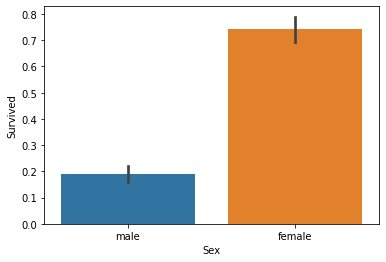

In [9]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.show()

### Pclass Feature

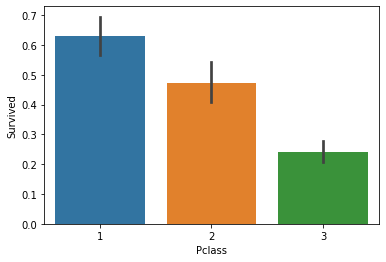

In [10]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

### SibSP Feature 

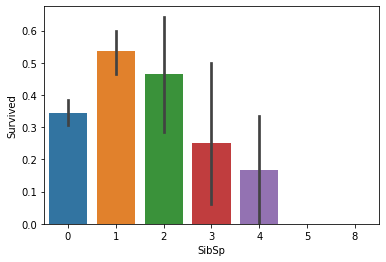

In [11]:
sns.barplot(x="SibSp", y="Survived", data=df)
plt.show()

### Parch Feature

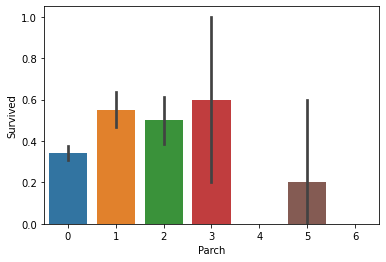

In [12]:
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

### Age Feature

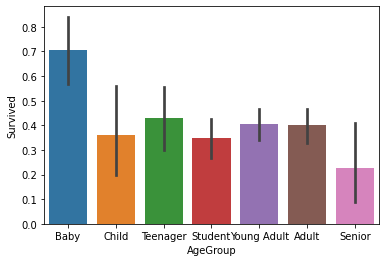

In [13]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins, labels=labels)

sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

### Cabin Feature

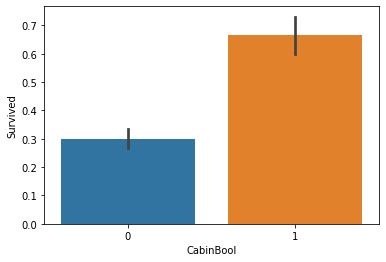

In [14]:
df['CabinBool'] = df['Cabin'].notnull().astype('int')

sns.barplot(x="CabinBool", y="Survived", data=df)
plt.show()

## DATA CLEANING

### Drop unnecessary Columns

In [15]:
df = df.drop(['PassengerId','Ticket', 'Cabin'], axis=1)

### Embarked Feature

In [16]:
print("Number of people embarking in Southampton (S):", df[df["Embarked"] == "S"].shape[0])
print("Number of people embarking in Cherbourg (C):", df[df["Embarked"] == "C"].shape[0])
print("Number of people embarking in Queenstown (Q):", df[df["Embarked"] == "Q"].shape[0])

Number of people embarking in Southampton (S): 644
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


In [17]:
df['Embarked'] = df['Embarked'].fillna('S')

### Age Feature

In [18]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

df['Title'] = df['Title'].map(title_mapping)
    
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Young Adult,0,6
887,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Student,1,2
888,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,NaN,0,2
889,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Young Adult,1,1


In [21]:
print('Mr Age Group(mode) -->', df[df["Title"] == 1]["AgeGroup"].mode()[0])
print('Miss Age Group(mode) -->', df[df["Title"] == 2]["AgeGroup"].mode()[0])
print('Mrs Age Group(mode) -->', df[df["Title"] == 3]["AgeGroup"].mode()[0])
print('Master Age Group(mode) -->', df[df["Title"] == 4]["AgeGroup"].mode()[0])
print('Royal Age Group(mode) -->', df[df["Title"] == 5]["AgeGroup"].mode()[0])
print('Rare Age Group(mode) -->', df[df["Title"] == 6]["AgeGroup"].mode()[0])

Mr Age Group(mode) --> Young Adult
Miss Age Group(mode) --> Student
Mrs Age Group(mode) --> Adult
Master Age Group(mode) --> Baby
Royal Age Group(mode) --> Young Adult
Rare Age Group(mode) --> Adult


In [22]:
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Young Adult", 6: "Adult"}

df['AgeGroup'] = df['AgeGroup'].fillna((df["Title"].map(age_title_mapping)))

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Young Adult,0,6
887,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Student,1,2
888,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Student,0,2
889,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Young Adult,1,1


In [23]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}

df['AgeGroup'] = df['AgeGroup'].map(age_mapping)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6,1,3
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5,0,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5,1,3
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5,0,6
887,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,4,1,2
888,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,4,0,2
889,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,5,1,1


In [24]:
df = df.drop(['Age', 'Name'], axis = 1)

### Sex Feature 

In [25]:
sex_mapping = {"male": 0 , "female": 1}

df['Sex'] = df['Sex'].map(sex_mapping)

df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,0.0,3,0,1,0,7.2500,S,4,0,1
1,1.0,1,1,1,0,71.2833,C,6,1,3
2,1.0,3,1,0,0,7.9250,S,5,0,2
3,1.0,1,1,1,0,53.1000,S,5,1,3
4,0.0,3,0,0,0,8.0500,S,5,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,0,0,0,13.0000,S,5,0,6
887,1.0,1,1,0,0,30.0000,S,4,1,2
888,0.0,3,1,1,2,23.4500,S,4,0,2
889,1.0,1,0,0,0,30.0000,C,5,1,1


### Embarked Feature

In [26]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

df['Embarked'] = df['Embarked'].map(embarked_mapping)

df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,0.0,3,0,1,0,7.2500,1,4,0,1
1,1.0,1,1,1,0,71.2833,2,6,1,3
2,1.0,3,1,0,0,7.9250,1,5,0,2
3,1.0,1,1,1,0,53.1000,1,5,1,3
4,0.0,3,0,0,0,8.0500,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,0,0,0,13.0000,1,5,0,6
887,1.0,1,1,0,0,30.0000,1,4,1,2
888,0.0,3,1,1,2,23.4500,1,4,0,2
889,1.0,1,0,0,0,30.0000,2,5,1,1


### Fare Feature

In [27]:
print('Class 1 Fare(mean) -->', df[df["Pclass"] == 1]["Fare"].mean())
print('Class 2 Fare(mean) -->', df[df["Pclass"] == 2]["Fare"].mean())
print('Class 3 Fare(mean) -->', df[df["Pclass"] == 3]["Fare"].mean())

Class 1 Fare(mean) --> 84.1546875
Class 2 Fare(mean) --> 20.662183152173913
Class 3 Fare(mean) --> 13.675550101832993


In [28]:
class_fare_mapping = {1: 84.1547, 2: 20.6622, 3: 13.6756}

df['Fare'] = df['Fare'].fillna((df["Pclass"].map(class_fare_mapping)))

df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,0.0,3,0,1,0,7.2500,1,4,0,1
1,1.0,1,1,1,0,71.2833,2,6,1,3
2,1.0,3,1,0,0,7.9250,1,5,0,2
3,1.0,1,1,1,0,53.1000,1,5,1,3
4,0.0,3,0,0,0,8.0500,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,0,0,0,13.0000,1,5,0,6
887,1.0,1,1,0,0,30.0000,1,4,1,2
888,0.0,3,1,1,2,23.4500,1,4,0,2
889,1.0,1,0,0,0,30.0000,2,5,1,1


In [29]:
maxi = df.Fare.max()
mini = df.Fare.min()

df['Fare'] = df['Fare']/(maxi - mini)

df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,0.0,3,0,1,0,0.014151,1,4,0,1
1,1.0,1,1,1,0,0.139136,2,6,1,3
2,1.0,3,1,0,0,0.015469,1,5,0,2
3,1.0,1,1,1,0,0.103644,1,5,1,3
4,0.0,3,0,0,0,0.015713,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,0,0,0,0.025374,1,5,0,6
887,1.0,1,1,0,0,0.058556,1,4,1,2
888,0.0,3,1,1,2,0.045771,1,4,0,2
889,1.0,1,0,0,0,0.058556,2,5,1,1


## CORRELATION PLOT

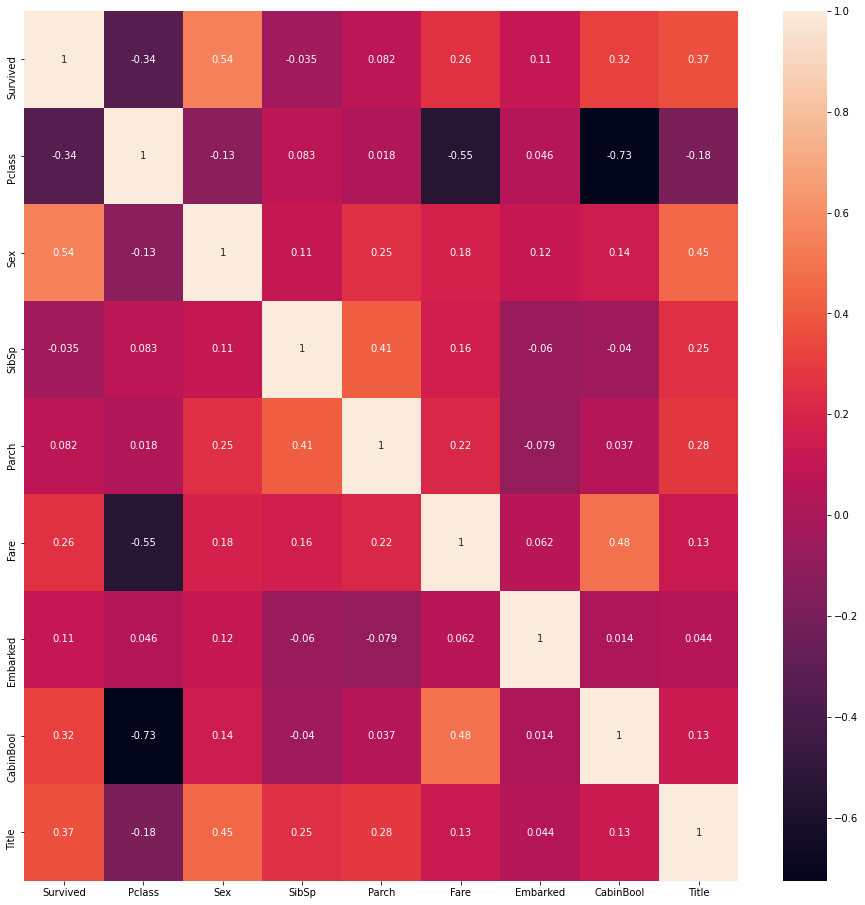

In [30]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True)
plt.show()

## TRAIN/TEST SPLIT

In [31]:
X = df.drop(['Survived'], axis=1).values
Y = df['Survived'].values

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.22, random_state = 0)

In [33]:
x_train = np.array(x_train, dtype='int64')
y_train = np.array(y_train, dtype='int64')

x_test = np.array(x_test, dtype='int64')
y_test = np.array(y_test, dtype='int64')

## MODELS

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [35]:
evalu_LR = LR_model.score(x_test,y_test)
print('The accuracy of Logistic Regresion Model on Test Data-Set is = '"{:.2f}".format(evalu_LR*100), '%')

The accuracy of Logistic Regresion Model on Test Data-Set is = 79.19 %


### Support Vector Machine(rbf Kernel)

In [36]:
from sklearn.svm import SVC

SVM_model_rbf = SVC()
SVM_model_rbf.fit(x_train,y_train)

SVC()

In [37]:
evalu_SVM_rbf = SVM_model_rbf.score(x_test,y_test)
print('The accuracy of Support Vector Machine Model on Test Data-Set is = '"{:.2f}".format(evalu_SVM_rbf*100), '%')

The accuracy of Support Vector Machine Model on Test Data-Set is = 83.76 %


### Support Vector Machine(linear Kernel)

In [38]:
from sklearn.svm import SVC

SVM_model_l = SVC(kernel='linear')
SVM_model_l.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
evalu_SVM_l = SVM_model_l.score(x_test,y_test)
print('The accuracy of Support Vector Machine Model on Test Data-Set is = '"{:.2f}".format(evalu_SVM_l*100), '%')

The accuracy of Support Vector Machine Model on Test Data-Set is = 79.19 %


### Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(criterion='entropy')
DTC_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
evalu_DTC = DTC_model.score(x_test,y_test)
print('The accuracy of Support Vector Machine Model on Test Data-Set is = '"{:.2f}".format(evalu_DTC*100), '%')

The accuracy of Support Vector Machine Model on Test Data-Set is = 76.65 %


### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(n_estimators=30)
RFC_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [49]:
evalu_RFC = RFC_model.score(x_test,y_test)
print('The accuracy of Random Forest Classifier Model on Test Data-Set is = '"{:.2f}".format(evalu_RFC*100), '%')

The accuracy of Random Forest Classifier Model on Test Data-Set is = 80.20 %


### K-Nearest Neighbour 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [45]:
evalu_KNN = KNN_model.score(x_test,y_test)
print('The accuracy of Random Forest Classifier Model on Test Data-Set is = '"{:.2f}".format(evalu_KNN*100), '%')

The accuracy of Random Forest Classifier Model on Test Data-Set is = 83.25 %


### Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model.fit(x_train,y_train)

MultinomialNB()

In [47]:
evalu_NB = NB_model.score(x_test,y_test)
print('The accuracy of Gaussian Naive Bayes Model on Test Data-Set is = '"{:.2f}".format(evalu_NB*100), '%')

The accuracy of Gaussian Naive Bayes Model on Test Data-Set is = 78.17 %
